[TrainClass] CWR added as callback
Done!-- LRS-1.png
[TrainClass] CWR added as callback
Done!-- LRS-2.png
[TrainClass] CWR added as callback
Done!-- LRS-3.png
[TrainClass] CWR added as callback
Done!-- LRS-4.png


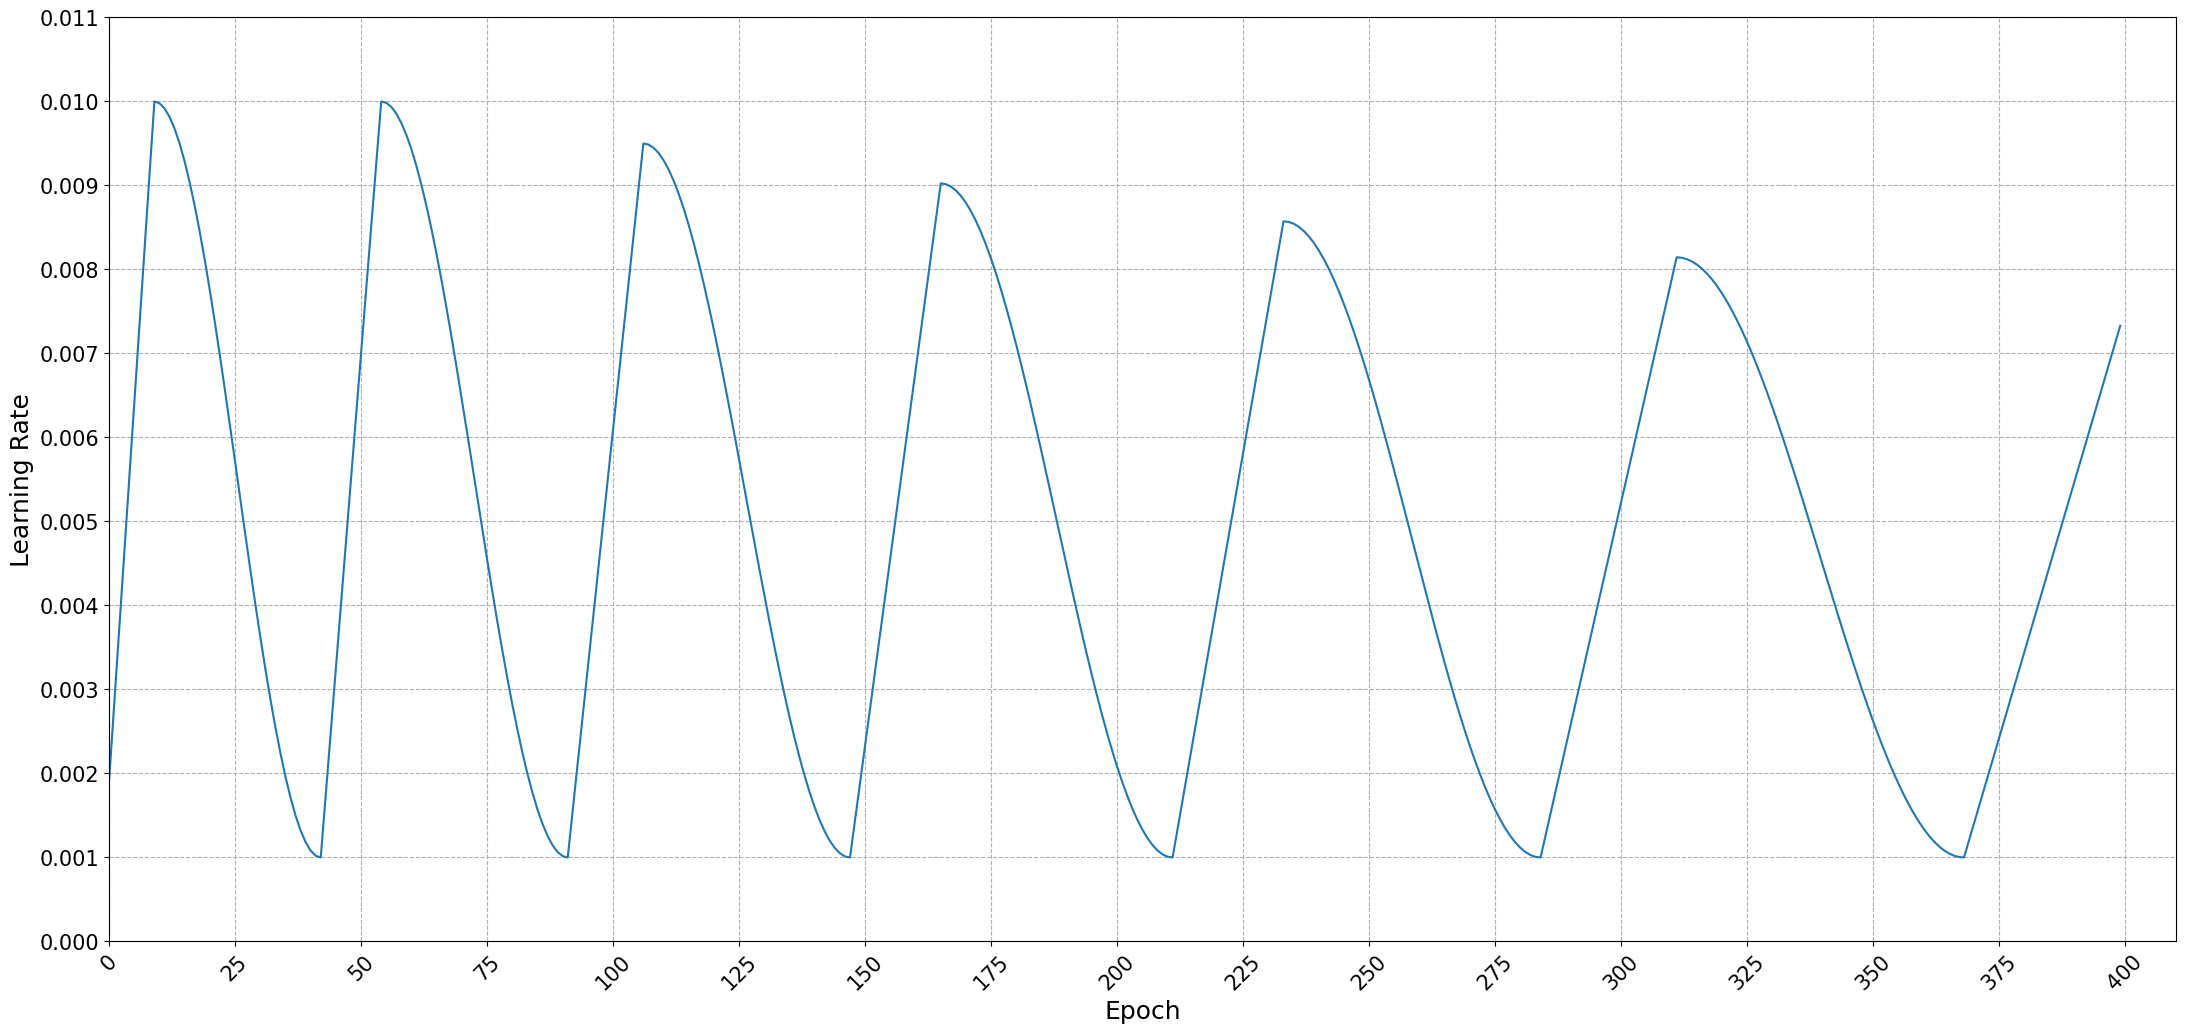

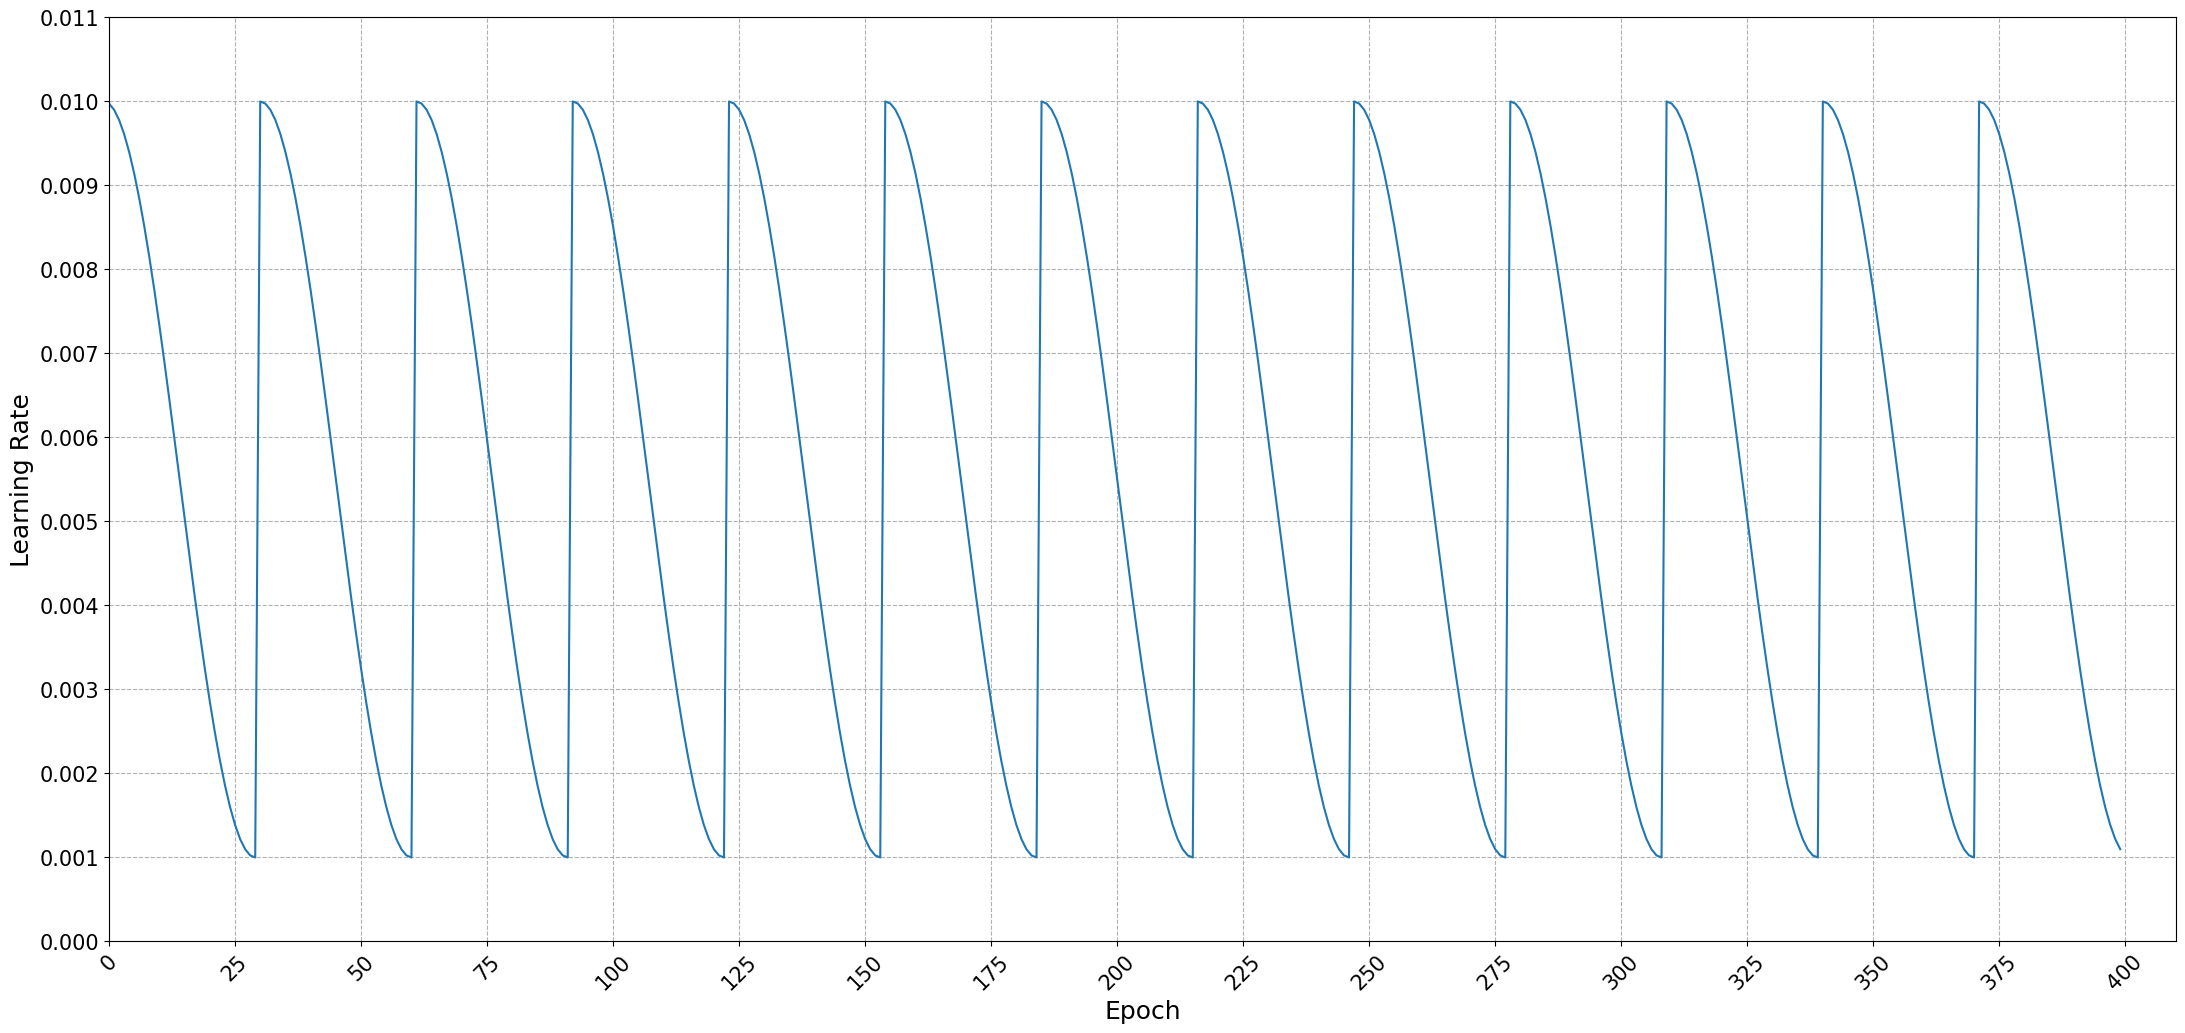

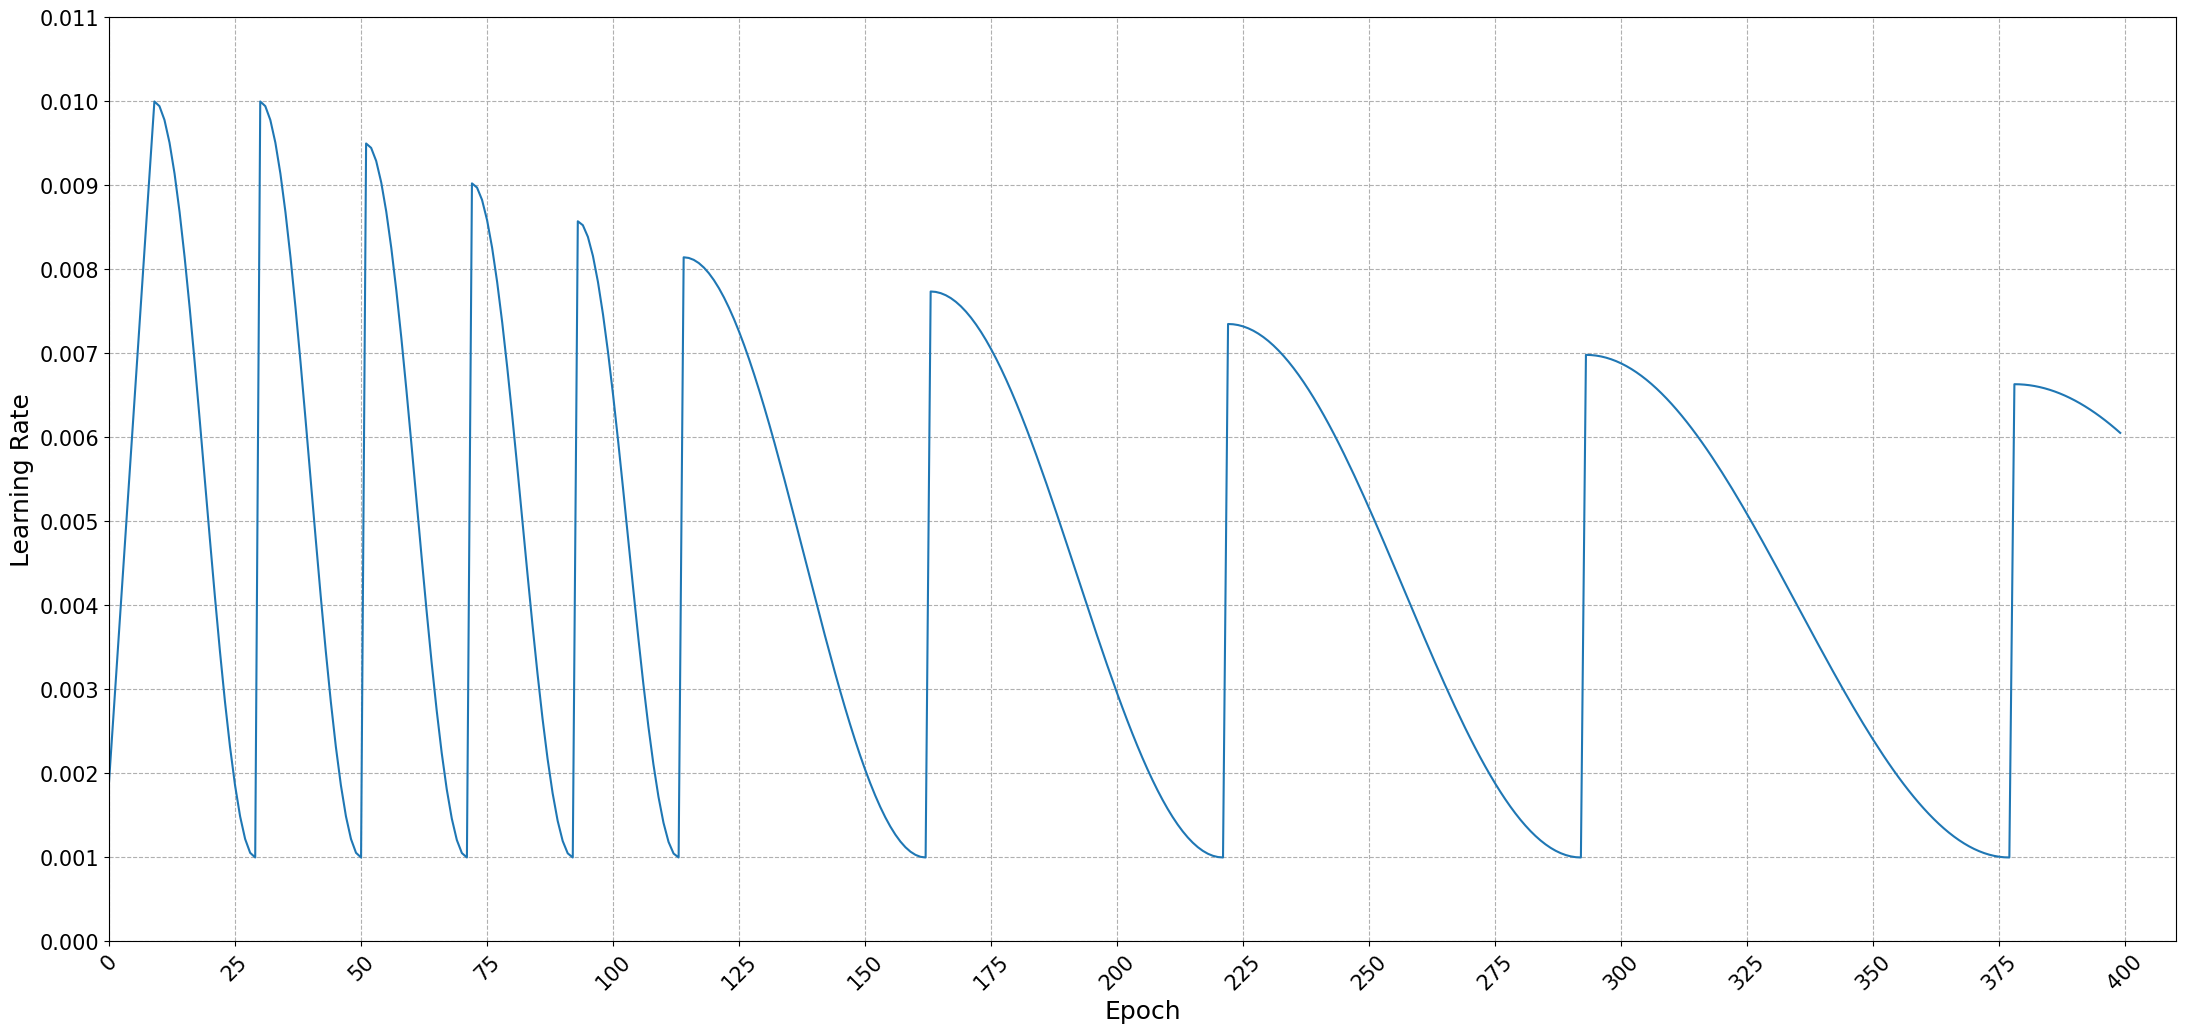

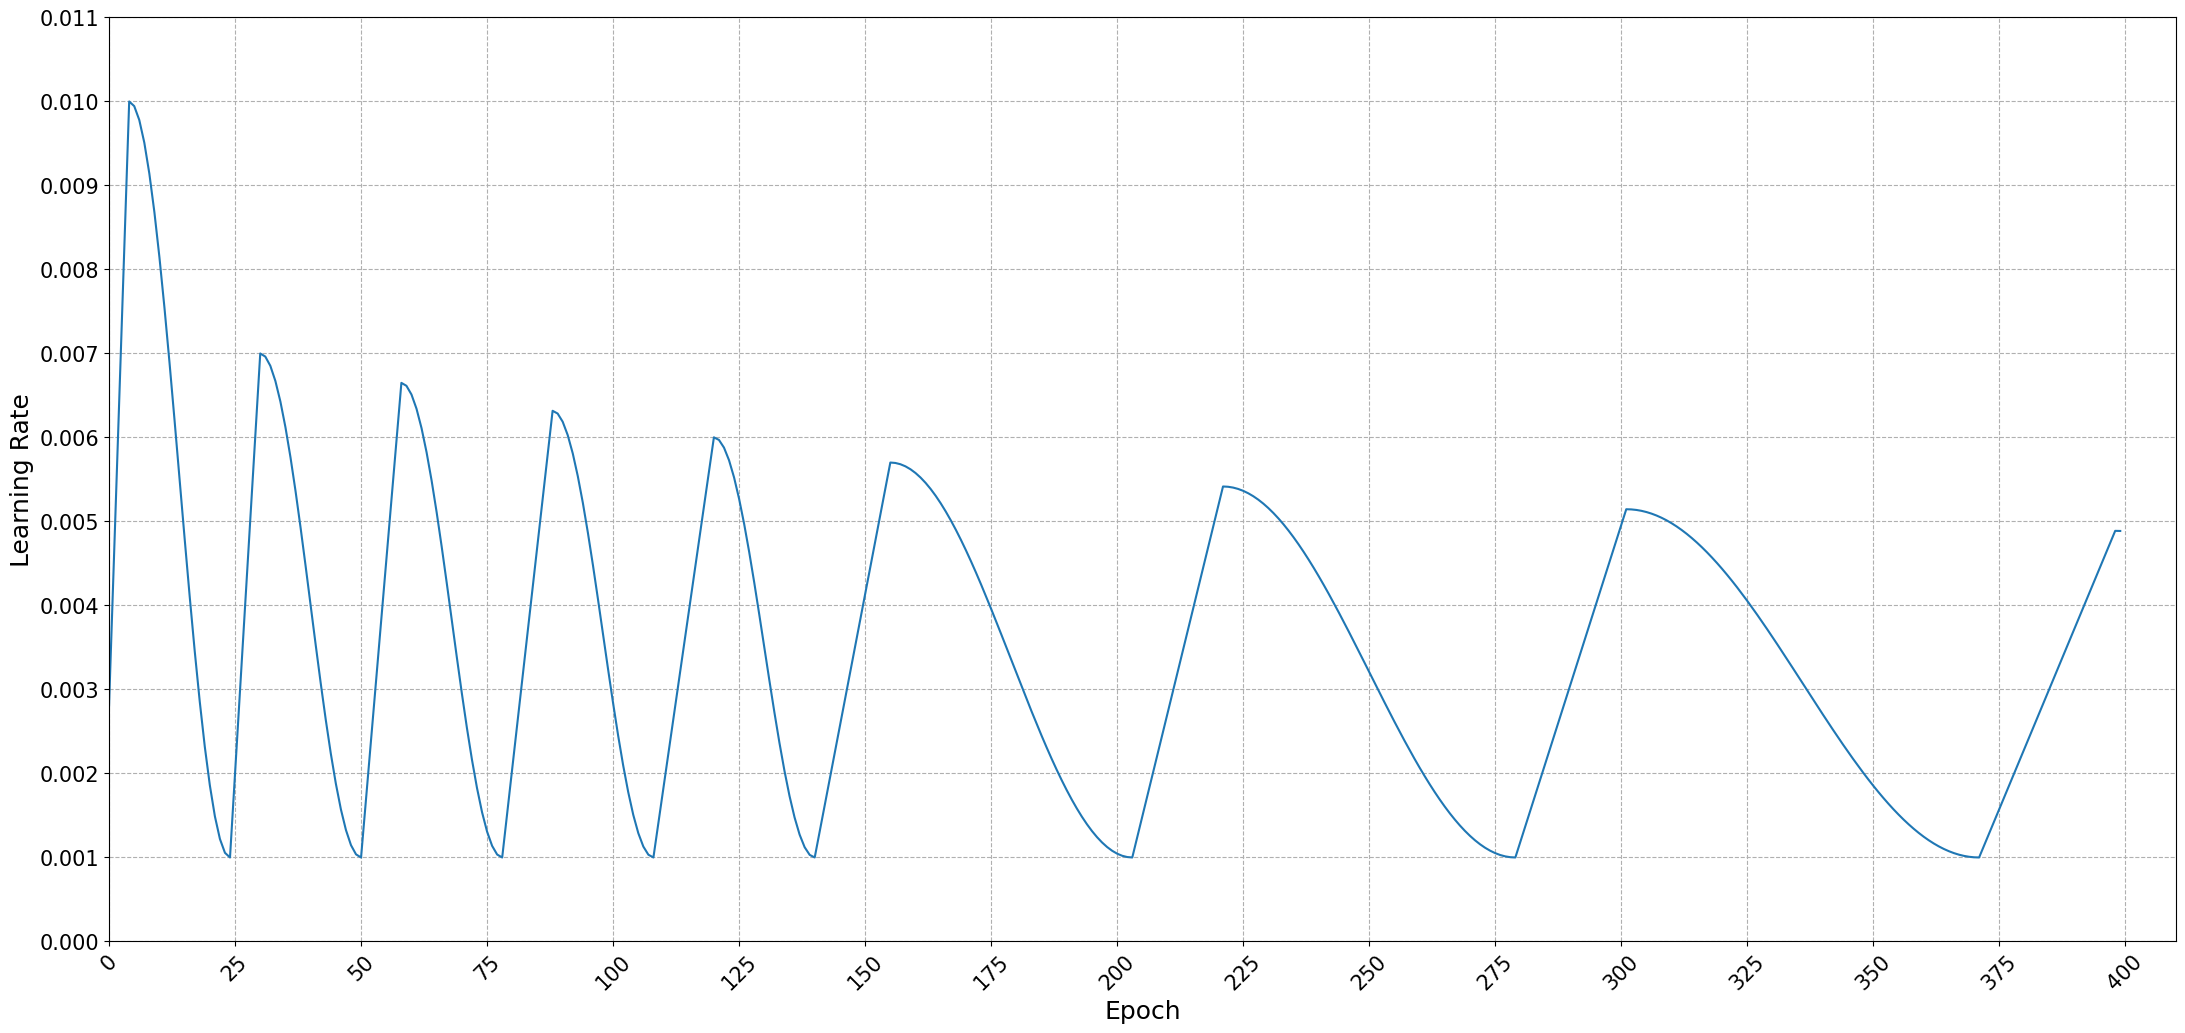

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
import sys
sys.path.append("..")
from src import SGDRScheduler_custom
# create a dummy model with an optimizer

def plot_lrs(sgdr, filename):
    model = Sequential()                # this is a placeholder and won't actually be used for training
    model.add(Dense(1, input_dim=1))    # add a simple layer just to define an input shape
    model.compile(optimizer=Adam())     # the optimizer type doesn't matter here
    sgdr.set_model(model)  # attach the dummy model to the scheduler
    num_epochs = 400
    learning_rates = []
    for epoch in range(num_epochs):
        for _ in range(sgdr.steps_per_epoch):
            sgdr.on_batch_end(None)
        learning_rates.append(K.get_value(sgdr.model.optimizer.lr))
        sgdr.on_epoch_end(epoch)

    fig = plt.figure(figsize=(num_epochs/15, 12))
    plt.plot(np.arange(num_epochs), learning_rates)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Learning Rate', fontsize=18)
    plt.xticks(np.arange(0, num_epochs+25, 25), np.arange(0, num_epochs+25, 25), fontsize=15, rotation=45)
    plt.xlim(0, num_epochs+10)
    plt.yticks(np.arange(0, 0.012, 0.001), fontsize=15)
    plt.ylim(0, 0.011)
    plt.margins(0)
    plt.grid(which='major', axis='both', linestyle='--')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    K.clear_session()
    del model, sgdr, learning_rates, num_epochs, epoch
    print('Done!--', filename)

sgdr = SGDRScheduler_custom(
    min_lr=0.001, 
    max_lr=0.01, 
    steps_per_epoch=10,
    first_lr_drop_mult=1,
    general_lr_decay=0.95, 
    if_warmup_or_cooldown_start=0,
    init_cooldown_length=30,
    init_cooldown_mult_factor=1.1,
    warmup_length=10,
    warmup_mult_factor=1.2,
    if_post_warmup=1,
    number_of_cooldowns_before_switch=0,
    new_cooldown_length=30,
    new_cooldown_mult_factor=1.1,
    )
plot_lrs(sgdr, 'LRS-1.png')

sgdr = SGDRScheduler_custom(
    min_lr=0.001, 
    max_lr=0.01, 
    steps_per_epoch=10,
    first_lr_drop_mult=1,
    general_lr_decay=1, 
    if_warmup_or_cooldown_start=1,
    init_cooldown_length=30,
    init_cooldown_mult_factor=1,
    warmup_length=10,
    warmup_mult_factor=1,
    if_post_warmup=0,
    number_of_cooldowns_before_switch=0,
    new_cooldown_length=30,
    new_cooldown_mult_factor=1,
    )
plot_lrs(sgdr, 'LRS-2.png')

sgdr = SGDRScheduler_custom(
    min_lr=0.001, 
    max_lr=0.01, 
    steps_per_epoch=10,
    first_lr_drop_mult=1,
    general_lr_decay=0.95, 
    if_warmup_or_cooldown_start=0,
    init_cooldown_length=20,
    init_cooldown_mult_factor=1,
    warmup_length=10,
    warmup_mult_factor=1,
    if_post_warmup=0,
    number_of_cooldowns_before_switch=5,
    new_cooldown_length=40,
    new_cooldown_mult_factor=1.2,
    )
plot_lrs(sgdr, 'LRS-3.png')

sgdr = SGDRScheduler_custom(
    min_lr=0.001, 
    max_lr=0.01, 
    steps_per_epoch=10,
    first_lr_drop_mult=0.70,
    general_lr_decay=0.95, 
    if_warmup_or_cooldown_start=0,
    init_cooldown_length=20,
    init_cooldown_mult_factor=1,
    warmup_length=5,
    warmup_mult_factor=1.2,
    if_post_warmup=1,
    number_of_cooldowns_before_switch=5,
    new_cooldown_length=40,
    new_cooldown_mult_factor=1.2,
    )
plot_lrs(sgdr, 'LRS-4.png')
